In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data=pd.read_excel("cust_data.xlsx")
data

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,M,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,M,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#EDA
#Data Exploration

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [5]:
data.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [6]:
data=data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27276 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 27276 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  27276 non-null  int64 
 3   Jordan                  27276 non-null  int64 
 4   Gatorade                27276 non-null  int64 
 5   Samsung                 27276 non-null  int64 
 6   Asus                    27276 non-null  int64 
 7   Udis                    27276 non-null  int64 
 8   Mondelez International  27276 non-null  int64 
 9   Wrangler                27276 non-null  int64 
 10  Vans                    27276 non-null  int64 
 11  Fila                    27276 non-null  int64 
 12  Brooks                  27276 non-null  int64 
 13  H&M                     27276 non-null  int64 
 14  Dairy Queen             27276 non-null  int64 
 15  Fe

In [7]:
data.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,...,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000,27276.000000
mean,15026.349795,4.244647,0.276873,0.262795,0.227489,0.168463,0.147492,0.142140,0.108740,0.114276,...,0.102691,0.272877,0.376778,0.160141,0.077797,0.057303,0.193760,0.120656,0.090592,0.071271
std,8655.855928,3.580825,0.817612,0.719259,0.925124,0.757750,0.656230,0.530013,0.519941,0.553790,...,0.492114,0.716391,0.760309,0.507343,0.384146,0.299185,0.628296,0.457624,0.405152,0.387592
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7557.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15065.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22537.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [8]:
#LabelEncoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Gender']=le.fit_transform(data.Gender)
data1=data.drop("Cust_ID",axis=1)
data1

<ipython-input-8-ff0e6e00d889>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender']=le.fit_transform(data.Gender)


,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,4,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
29998,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


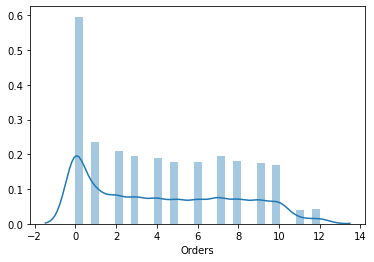

In [9]:
#Visualizing the data
sb.distplot(data["Orders"],kde=True)

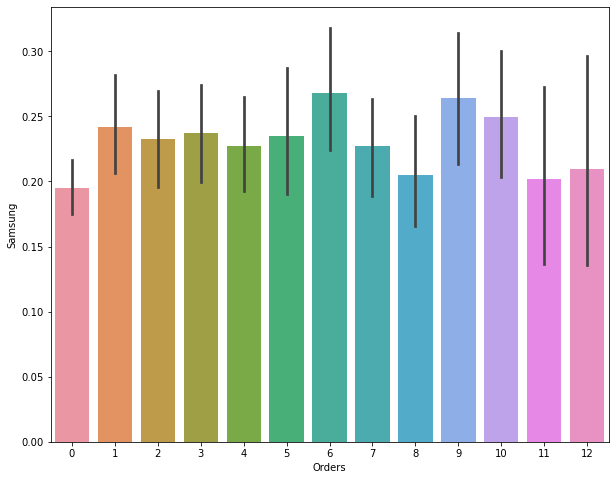

In [10]:
plt.figure(figsize=(10,8))
sb.barplot(x="Orders",y="Samsung",data=data)

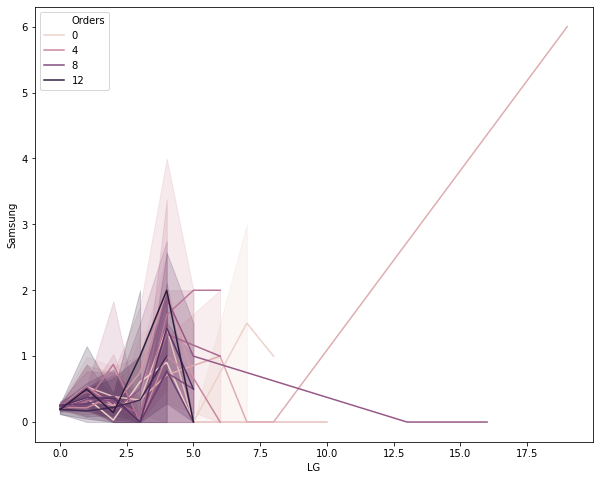

In [11]:
plt.figure(figsize=(10,8))
sb.lineplot(x="LG",y="Samsung",hue="Orders",data=data)

In [12]:
#Clustering
from sklearn.cluster import KMeans

In [13]:
kmeans=KMeans(2)
kmeans.fit(data1)

KMeans(n_clusters=2)

In [14]:
clusters=data1.copy()
clusters["cluster_pred"]=kmeans.predict(data1)
clusters

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,cluster_pred
0,1,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,4,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29996,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29997,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
29998,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
#Preprocessing

In [16]:
from sklearn import preprocessing
x_scaled=preprocessing.scale(data1)
x_scaled

array([[ 2.05506353,  0.76948834, -0.33864289, ..., -0.2636613 ,
        -0.22360514, -0.18388622],
       [-0.48660296, -1.18540419, -0.33864289, ..., -0.2636613 ,
        -0.22360514, -0.18388622],
       [ 2.05506353,  0.76948834, -0.33864289, ...,  1.9215789 ,
        -0.22360514, -0.18388622],
       ...,
       [ 2.05506353, -1.18540419, -0.33864289, ..., -0.2636613 ,
        -0.22360514, -0.18388622],
       [ 2.05506353, -1.18540419, -0.33864289, ..., -0.2636613 ,
        -0.22360514, -0.18388622],
       [-0.48660296, -0.3475931 ,  2.10754975, ..., -0.2636613 ,
        -0.22360514, -0.18388622]])

In [17]:
#Elbow Method

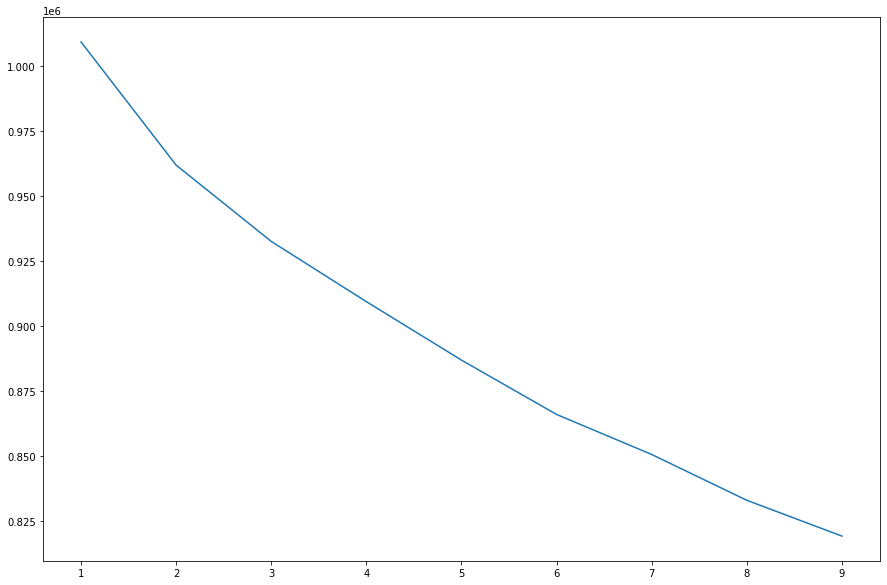

In [18]:
plt.figure(figsize=(15,10))
a=[]
for i in range(1,10):
    kmeans=KMeans(i)
    kmeans.fit(x_scaled)
    a.append(kmeans.inertia_)
plt.plot(range(1,10),a)  

In [19]:
kmeans_new=KMeans(2)
k_fit=kmeans_new.fit(data1)
cluster_new=data1.copy()
cluster_new["cluster_pred"]=k_fit.predict(x_scaled)
cluster_new

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,cluster_pred
0,1,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,4,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29996,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29997,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
29998,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
#silhouette
from sklearn.metrics import silhouette_score

In [24]:
silhouette_avg = silhouette_score(x_scaled,k_fit.predict(data1))
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.038964814586784274
